In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

In [113]:
def get_lower_and_upper_bounds(df, column, multiplier=1.5):

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    return lower_bound, upper_bound

In [5]:
#url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
#df = pd.read_csv(url)

In [143]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv")

In [144]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [145]:
df["Month"] = df.index.month_name()

In [146]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   Month        365 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


In [148]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


In [18]:
get_lower_and_upper_bounds(df, 'Sales')

(5.0, 45.0)

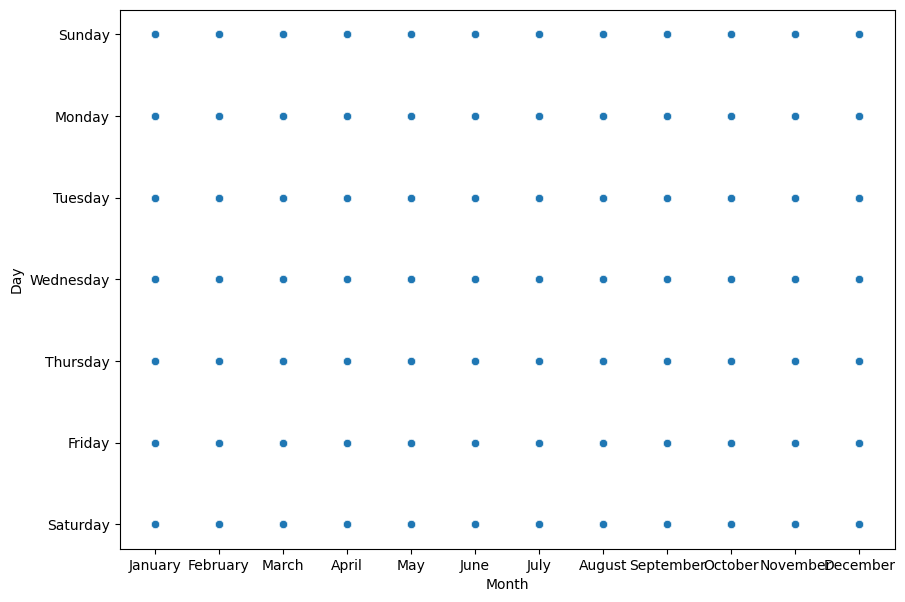

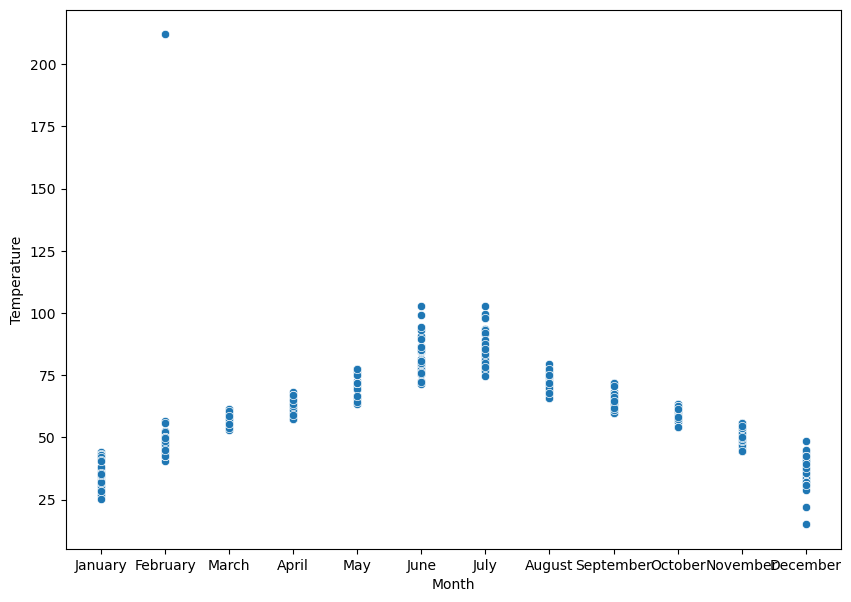

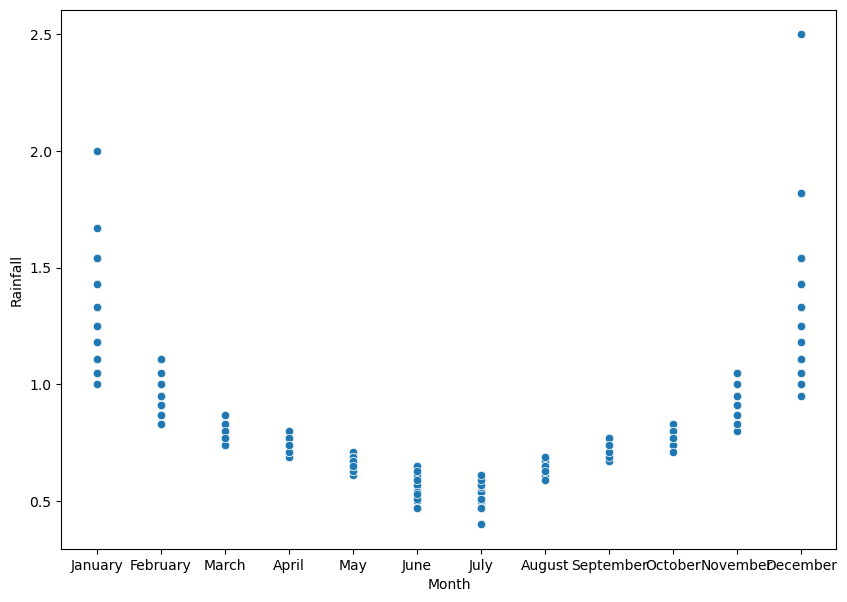

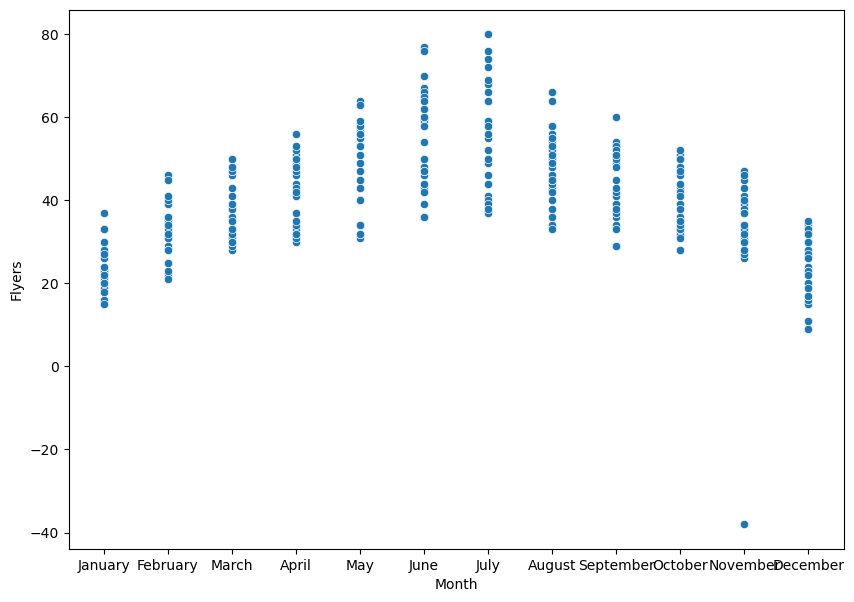

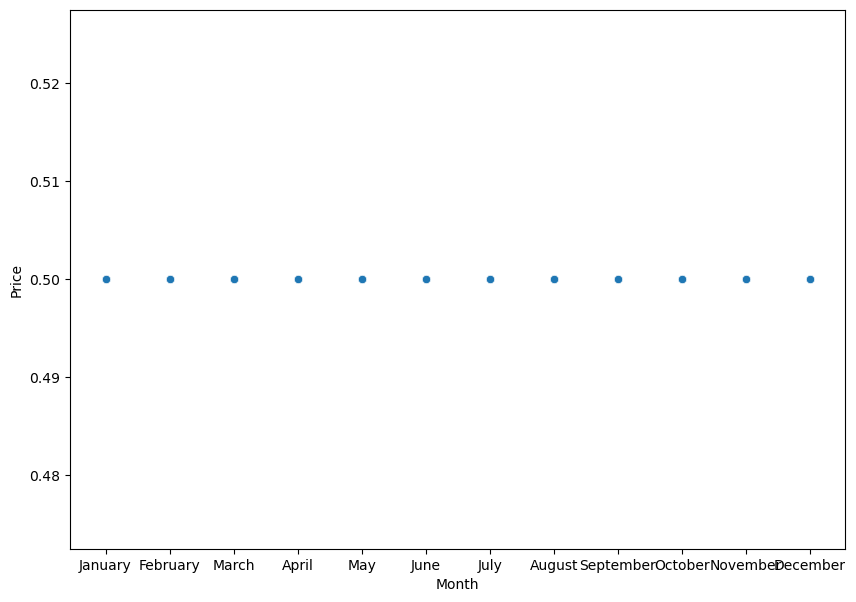

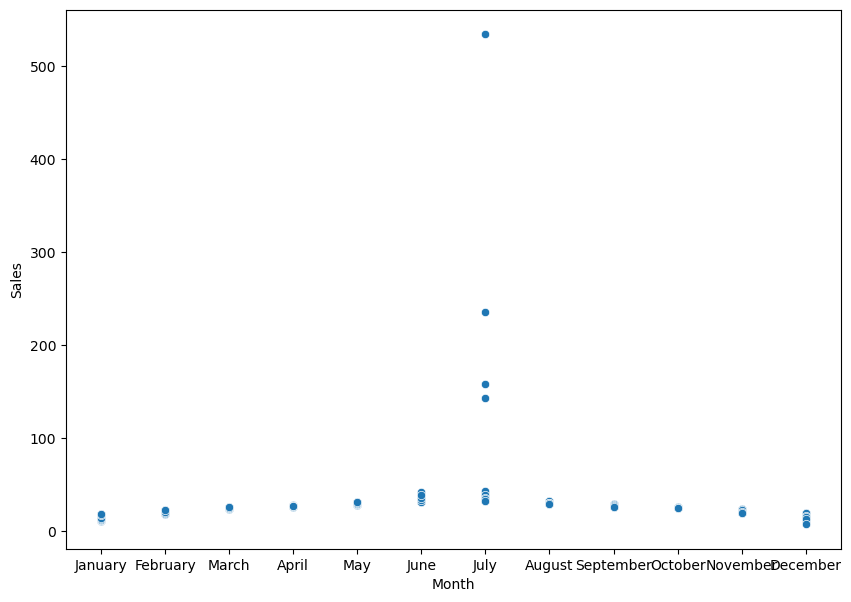

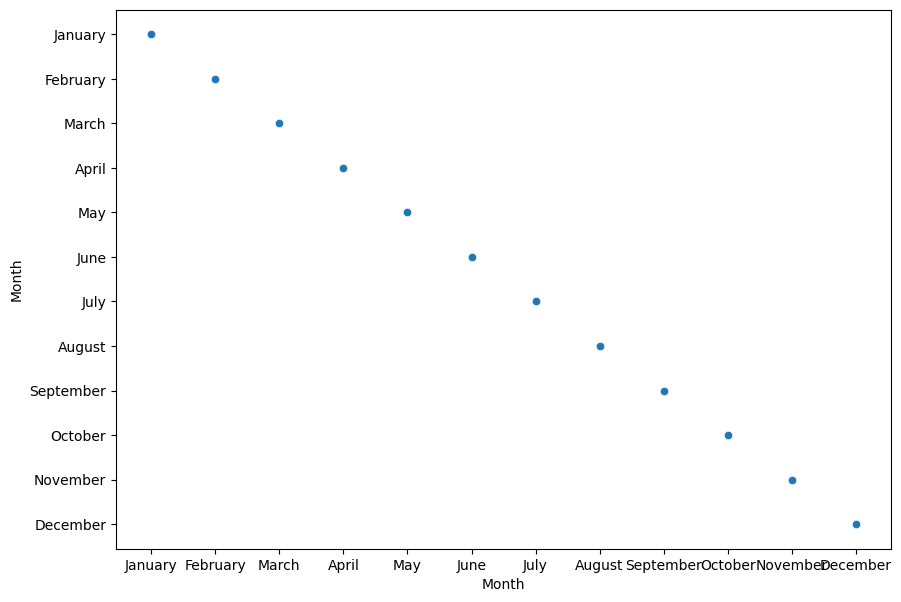

In [150]:
for col in df.columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(x= df.Month, y= df[col])

<div class = "alert alert-block alert-info">

# 1. Using lemonade.csv dataset and focusing on continuous variables


<div class = "alert alert-block alert-info">
    
### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
    

In [120]:
new_columns = ['feature', 'lower_outliers', 'upper_outliers', 'low_outlier_value', 'high_outlier_value']
outlier_df = pd.DataFrame(columns=new_columns)
for col in df.columns:
    
    if np.issubdtype(df[col].dtype, np.number):
    #if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        lower, upper = get_lower_and_upper_bounds(df, col)
        outlier_df.loc[len(outlier_df)] = [col, (df[col] < lower).sum(), (df[col] > upper).sum(), lower, upper]
        
        
outlier_df

,feature,lower_outliers,upper_outliers,low_outlier_value,high_outlier_value
0,Temperature,1,1,16.70,104.7
1,Rainfall,0,28,0.26,1.3
2,Flyers,1,2,4.00,76.0
3,Price,0,0,0.50,0.5
4,Sales,0,4,5.00,45.0


In [69]:
28/365

0.07671232876712329

### The upper outliers for 'Rainfall' seems to be a pretty large number. It represents 7.7% of the available days in our sample. 

### The low temperature is not a day I would expect any kind of lemondade sales to occur. It is much too cold.

### I feel like days with 45 sales (there are 4) seems like a lot. 

<div class = "alert alert-info">

## Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
## Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [87]:
multiplier = [1.5, 3]
new_columns = ['multiplier', 'feature', 'lower_outliers', 'upper_outliers', 'low_outlier_value', 'high_outlier_value']
outlier_df = pd.DataFrame(columns=new_columns)
for i in multiplier:
   
    for col in df.columns:

        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            lower, upper = get_lower_and_upper_bounds(df, col, multiplier=i)
            outlier_df.loc[len(outlier_df)] = [i, col, (df[col] < lower).sum(), (df[col] > upper).sum(), lower, upper]
outlier_df

,multiplier,feature,lower_outliers,upper_outliers,low_outlier_value,high_outlier_value
0,1.5,Temperature,1,1,16.70,104.70
1,1.5,Rainfall,0,28,0.26,1.30
2,1.5,Flyers,1,2,4.00,76.00
3,1.5,Price,0,0,0.50,0.50
4,1.5,Sales,0,4,5.00,45.00
5,3.0,Temperature,0,1,-16.30,137.70
6,3.0,Rainfall,0,4,-0.13,1.69
7,3.0,Flyers,1,0,-23.00,103.00
8,3.0,Price,0,0,0.50,0.50
9,3.0,Sales,0,4,-10.00,60.00


### I was concerned about the rain lower outlier and it has not changed. 

### Rain's upper limit of 1.69 inches seems like it is too high to be useful. Any amount of rainfall that is over an inch and a half in a day seems like a day that we wouldn't expect many sales of lemonade. So, going from 28 outliers to 4 has made our anomaly detection less useful in this respect from a theoretical perspective. 

<div class = "alert alert-block alert-info">
    
# 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

### Use a 2 sigma decision rule to isolate the outliers.

### Do these make sense?
### Should certain outliers be kept or removed?

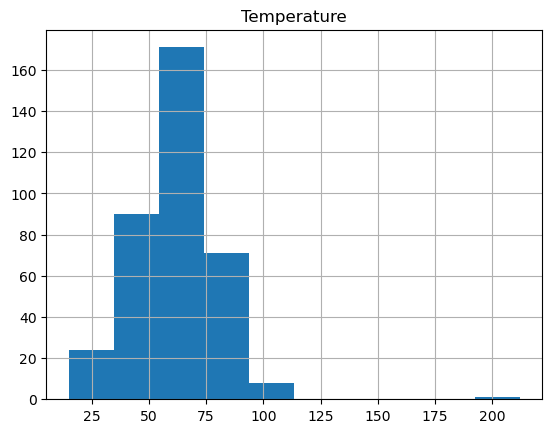

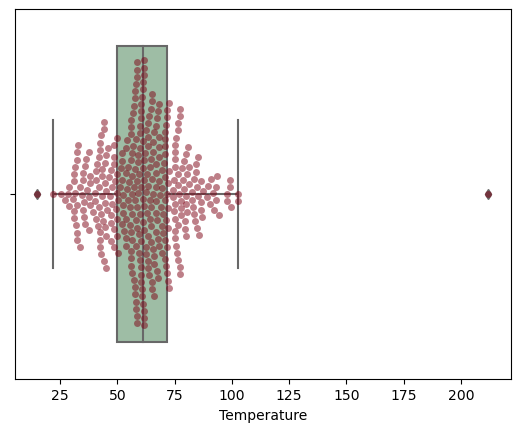

--------


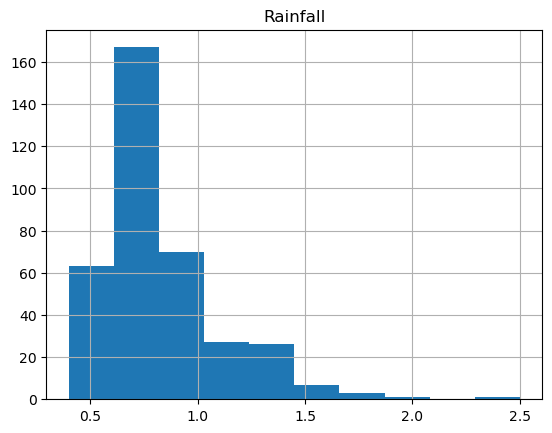

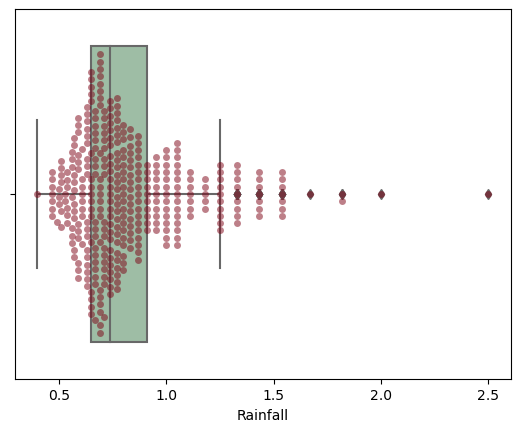

--------


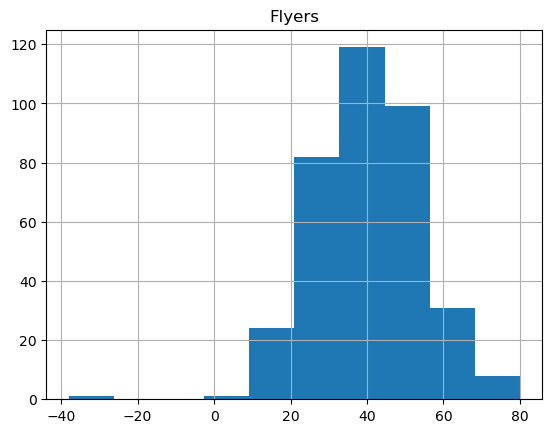

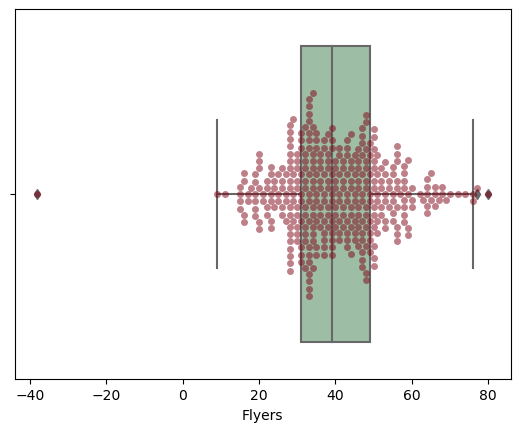

--------


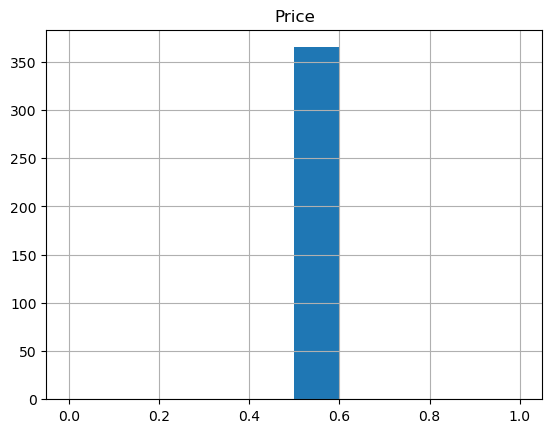

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


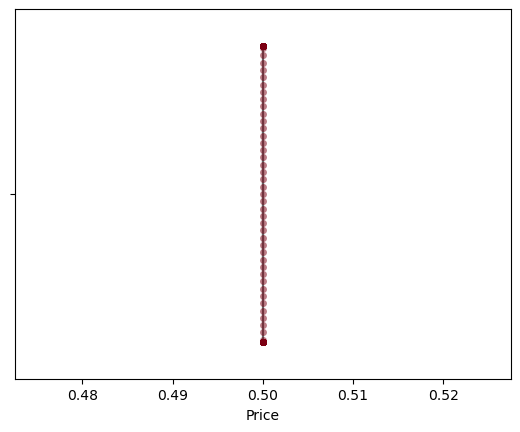

--------


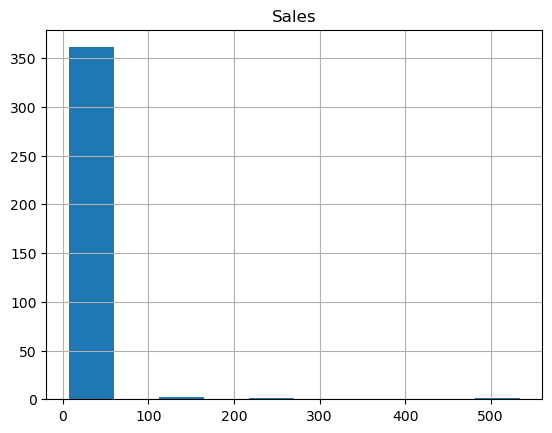

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


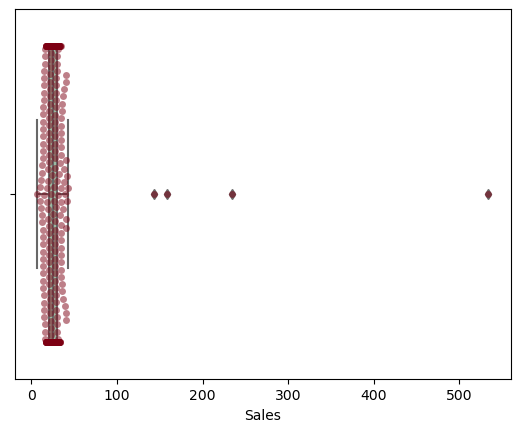

--------


In [81]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        ax = sns.boxplot(data=df, x=col, color='#99C2A2')
        ax = sns.swarmplot(data=df, x=col, color='#7D0013', alpha=0.5)
        plt.show()
        print('--------')

<div class = "alert alert-block alert-info">

### Use a 2 sigma decision rule to isolate the outliers.

### Do these make sense?
### Should certain outliers be kept or removed?

### There are some seriously wonky outliers that definitely need to be removed. The data does appear to be normally distributed to a pretty strong degree. I will remove outliers that are beyond 2 standard deviations and replot.

In [88]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [109]:
df_cleaned = df
   
for col in df_cleaned.columns:

    if np.issubdtype(df[col].dtype, np.number):
        lower, upper = get_lower_and_upper_bounds(df, col, multiplier=2)
        #outlier_df.loc[len(outlier_df)] = [i, col, (df[col] < lower).sum(), (df[col] > upper).sum(), lower, upper]
        df_cleaned = df_cleaned[df_cleaned[col] >= lower]
        df_cleaned = df_cleaned[df_cleaned[col] <= upper]

In [111]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 1 to 363
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         347 non-null    object 
 1   Day          347 non-null    object 
 2   Temperature  347 non-null    float64
 3   Rainfall     347 non-null    float64
 4   Flyers       347 non-null    int64  
 5   Price        347 non-null    float64
 6   Sales        347 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 21.7+ KB


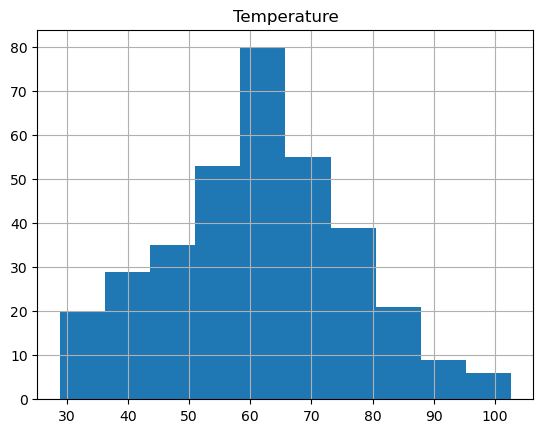

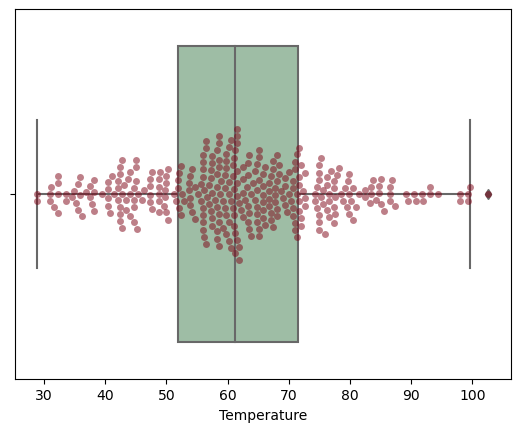

--------


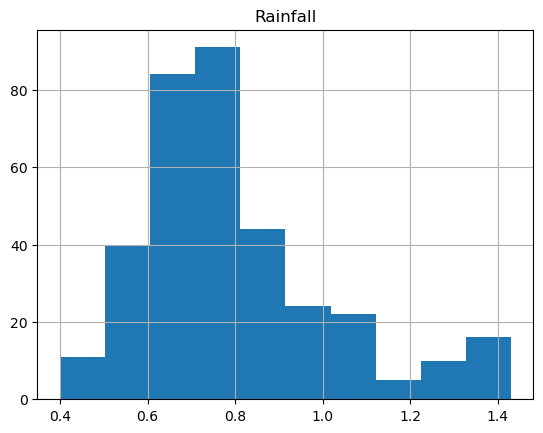

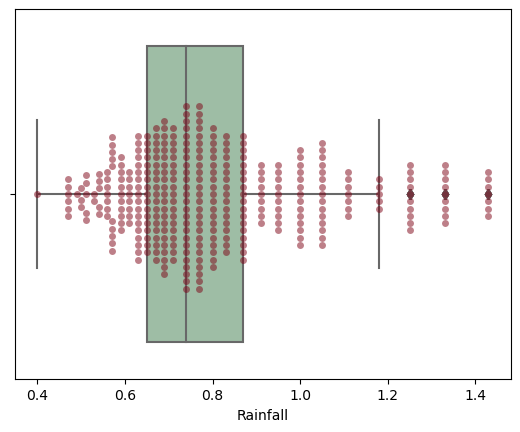

--------


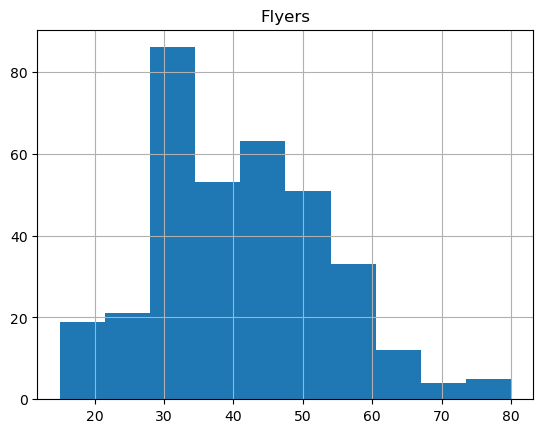

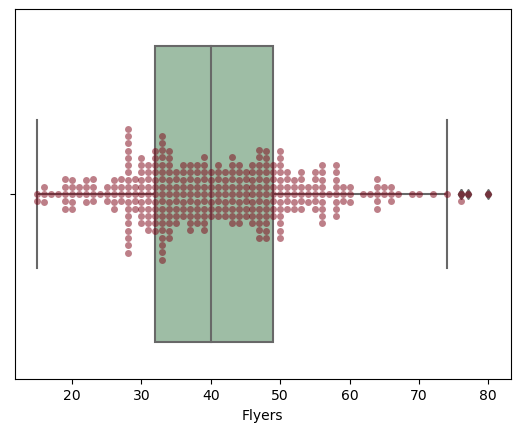

--------


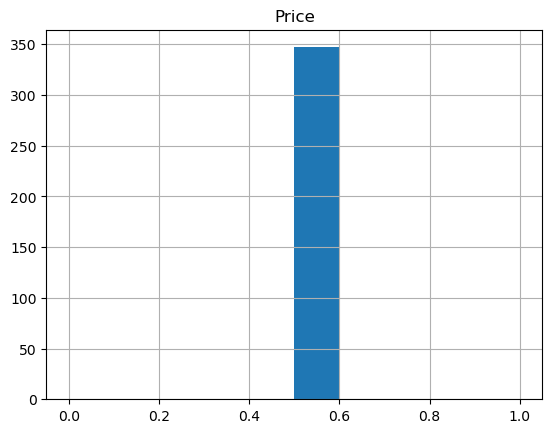

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


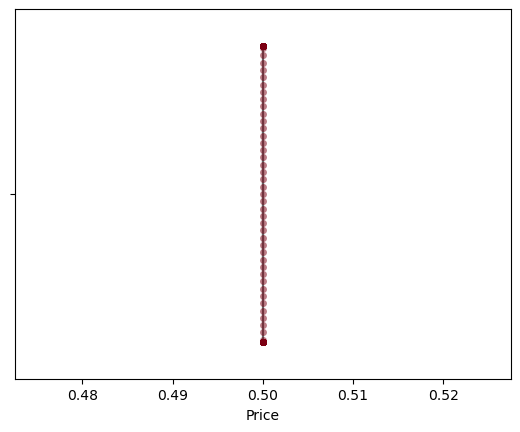

--------


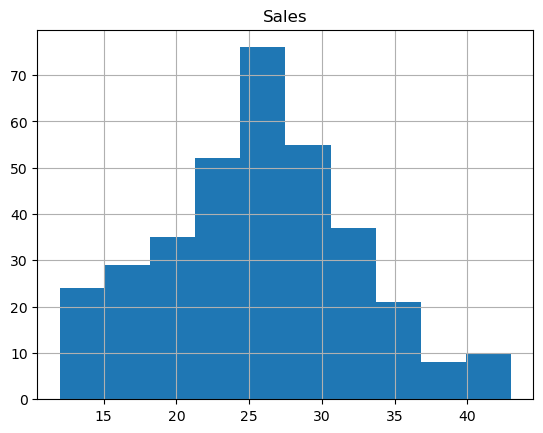

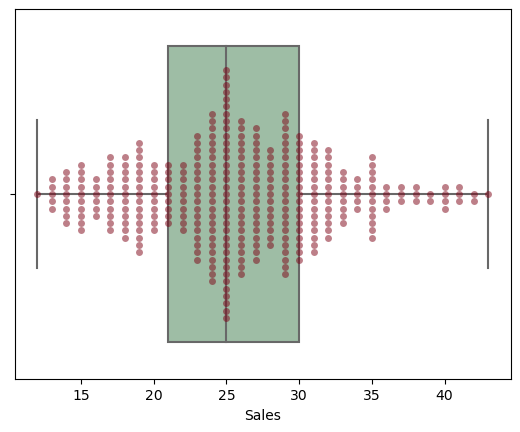

--------


In [112]:
for col in df_cleaned.columns:
    if np.issubdtype(df_cleaned[col].dtype, np.number):
        df_cleaned[col].hist()
        plt.title(col)
        plt.show()
        ax = sns.boxplot(data=df_cleaned, x=col, color='#99C2A2')
        ax = sns.swarmplot(data=df_cleaned, x=col, color='#7D0013', alpha=0.5)
        plt.show()
        print('--------')